In [33]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pickle
from collections import Counter

# Loading data and creating dataset

In [34]:
ann_path = '../input/face-mask-detection/annotations'
image_path = '../input/face-mask-detection/images'
names = os.listdir(ann_path)

In [58]:
labels = []
images = []

for i, name in enumerate(names):
    if i % 100 == 0:
        print(i, 'from', len(names))
    path = ann_path + '/' + name
    with open(path, 'r') as file:
        ann = file.read()
        soup = soup = BeautifulSoup(ann)
        
        image_name = soup.find('filename').text
        path = image_path + '/' + image_name
        image = Image.open(path)
        image = np.array(image)
        
        objects = soup.findAll('object')
        for obj in objects:
            label = obj.find('name').text
            labels.append(label)
            
            xmin = int(obj.find('xmin').text)
            ymin = int(obj.find('ymin').text)
            xmax = int(obj.find('xmax').text)
            ymax = int(obj.find('ymax').text)
            
            obj_image = image[ymin:ymax, xmin:xmax]
            images.append(obj_image)

0 from 853
100 from 853
200 from 853
300 from 853
400 from 853
500 from 853
600 from 853
700 from 853
800 from 853


# Checking class sizes

In [36]:
np.unique(labels, return_counts=True)

(array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype='<U21'),
 array([ 123, 3232,  717]))

# Dataset preview

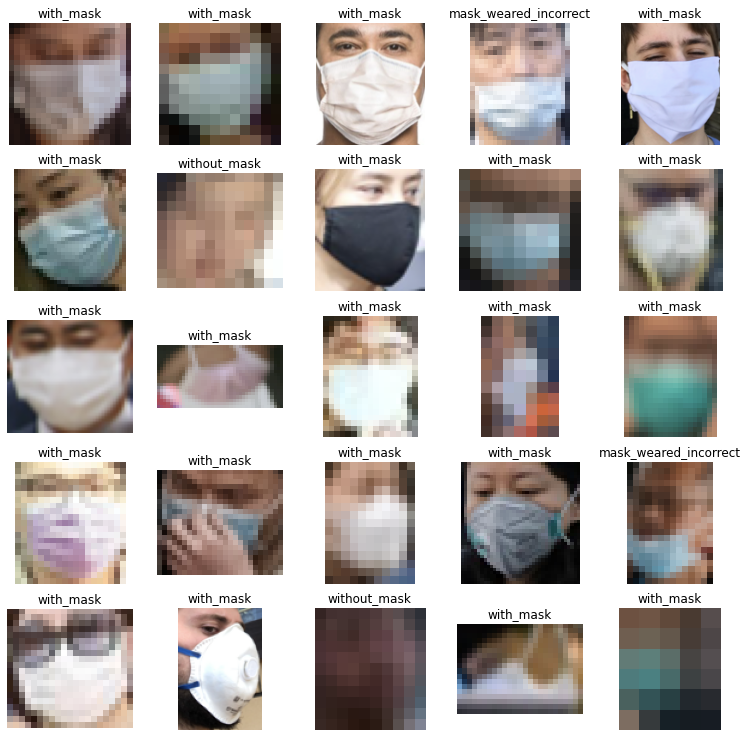

In [37]:
n = 25

random_indices = np.random.choice(len(labels), size=n, replace=False)
plt.figure(figsize=(13,13))
for i, idx in enumerate(random_indices):
    image = images[idx]
    label = labels[idx]
    
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()

# Saving the dataset to a file

In [59]:
with open('FaseMaskDetection.pkl', 'wb') as file:
    dataset = {'images':images, 'labels':labels}
    pickle.dump(dataset, file)